<a href="https://colab.research.google.com/github/parthpendal/Projects---Data-Analysis-and-Machine-Learning/blob/main/Machine_Learning_House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Source data: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

In [ ]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
# Reading train dataset
df_train=pd.read_csv("train.csv")

# Reading test dataset
df_test=pd.read_csv("test.csv")

In [ ]:
#Understand size of train and test files
print(df_train.shape)
print(df_test.shape)

(1460, 81)
(1459, 80)


In [ ]:
#Find out conut of null values in each columns for train dataset
df_train.isnull().sum().head(50)

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
Alley           1369
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         8
MasVnrArea         8
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinSF1         0
BsmtFinType2      38
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath 

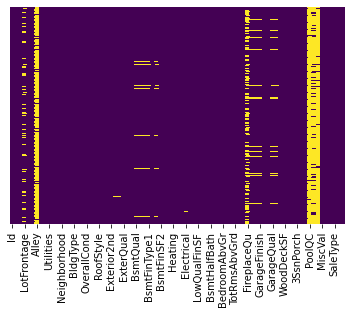

In [ ]:
#Try to see null values with heatmap
sns.heatmap(df_train.isnull(),yticklabels=False,cbar=False,cmap="viridis")

In [ ]:
#Find out conut of null values in each columns for test dataset
df_test.isnull().sum().head(50)

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
Street             0
Alley           1352
LotShape           0
LandContour        0
Utilities          2
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        1
Exterior2nd        1
MasVnrType        16
MasVnrArea        15
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinSF1         1
BsmtFinType2      42
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
Heating            0
HeatingQC          0
CentralAir         0
Electrical         0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath 

In [ ]:
# Replacing all the categorical values with mode and quantitative values with mean
df_test["MSZoning"]=df_test["MSZoning"].fillna(df_test["MSZoning"].mode()[0])

df_train["BsmtQual"]=df_train["BsmtQual"].fillna(df_train["BsmtQual"].mode()[0])
df_test["BsmtQual"]=df_test["BsmtQual"].fillna(df_test["BsmtQual"].mode()[0])

df_train["BsmtCond"]=df_train["BsmtCond"].fillna(df_train["BsmtCond"].mode()[0])
df_test["BsmtCond"]=df_test["BsmtCond"].fillna(df_test["BsmtCond"].mode()[0])

df_train["BsmtExposure"]=df_train["BsmtExposure"].fillna(df_train["BsmtExposure"].mode()[0])
df_test["BsmtExposure"]=df_test["BsmtExposure"].fillna(df_test["BsmtExposure"].mode()[0])

df_train["BsmtFinType1"]=df_train["BsmtFinType1"].fillna(df_train["BsmtFinType1"].mode()[0])
df_test["BsmtFinType1"]=df_test["BsmtFinType1"].fillna(df_test["BsmtExposure"].mode()[0])

df_train["BsmtFinType2"]=df_train["BsmtFinType2"].fillna(df_train["BsmtFinType2"].mode()[0])
df_test["BsmtFinType2"]=df_test["BsmtFinType2"].fillna(df_test["BsmtFinType2"].mode()[0])

df_train["BsmtFinSF2"]=df_train["BsmtFinSF2"].fillna(df_train["BsmtFinSF2"].mode()[0])
df_test["BsmtFinSF2"]=df_test["BsmtFinSF2"].fillna(df_test["BsmtFinSF2"].mode()[0])

df_train["Exterior1st"]=df_train["Exterior1st"].fillna(df_train["Exterior1st"].mode()[0])
df_test["Exterior1st"]=df_test["Exterior1st"].fillna(df_test["Exterior1st"].mode()[0])


df_train["Exterior2nd"]=df_train["Exterior2nd"].fillna(df_train["Exterior2nd"].mode()[0])
df_test["Exterior2nd"]=df_test["Exterior2nd"].fillna(df_test["Exterior2nd"].mode()[0])

df_train["MasVnrType"]=df_train["MasVnrType"].fillna(df_train["MasVnrType"].mode()[0])
df_test["MasVnrType"]=df_test["MasVnrType"].fillna(df_test["MasVnrType"].mode()[0])

df_train["BsmtFinType2"]=df_train["BsmtFinType2"].fillna(df_train["BsmtFinType2"].mode()[0])
df_test["BsmtFinType2"]=df_test["BsmtFinType2"].fillna(df_test["BsmtFinType2"].mode()[0])

df_test["Utilities"]=df_test["Utilities"].fillna(df_test["Utilities"].mode()[0])
df_train["Electrical"]=df_train["Electrical"].fillna(df_train["Electrical"].mode()[0])

df_test["Utilities"]=df_test["Utilities"].fillna(df_test["Utilities"].mode()[0])

df_test["BsmtFullBath"]=df_test["BsmtFullBath"].fillna(df_test["BsmtFullBath"].mode()[0])
df_test["BsmtHalfBath"]=df_test["BsmtHalfBath"].fillna(df_test["BsmtHalfBath"].mode()[0])

df_train["GarageType"]=df_train["GarageType"].fillna(df_train["GarageType"].mode()[0])
df_test["GarageType"]=df_test["GarageType"].fillna(df_test["GarageType"].mode()[0])

df_train["GarageYrBlt"]=df_train["GarageYrBlt"].fillna(df_train["GarageYrBlt"].mode()[0])
df_test["GarageYrBlt"]=df_test["GarageYrBlt"].fillna(df_test["GarageYrBlt"].mode()[0])

df_train["GarageFinish"]=df_train["GarageFinish"].fillna(df_train["GarageFinish"].mode()[0])
df_test["GarageFinish"]=df_test["GarageFinish"].fillna(df_test["GarageFinish"].mode()[0])


df_train["GarageCond"]=df_train["GarageCond"].fillna(df_train["GarageCond"].mode()[0])
df_test["GarageCond"]=df_test["GarageCond"].fillna(df_test["GarageCond"].mode()[0])


df_train["GarageQual"]=df_train["GarageQual"].fillna(df_train["GarageQual"].mode()[0])
df_test["GarageQual"]=df_test["GarageQual"].fillna(df_test["GarageQual"].mode()[0])

df_test["KitchenQual"]=df_test["KitchenQual"].fillna(df_test["KitchenQual"].mode()[0])
df_test["Functional"]=df_test["Functional"].fillna(df_test["Functional"].mode()[0])
df_test["GarageCars"]=df_test["GarageCars"].fillna(df_test["GarageCars"].mode()[0])


In [ ]:
df_train["LotFrontage"]=df_train["LotFrontage"].fillna(df_train["LotFrontage"].mean())
df_test["LotFrontage"]=df_test["LotFrontage"].fillna(df_test["LotFrontage"].mean())

df_train["BsmtFinSF1"]=df_train["BsmtFinSF1"].fillna(df_train["BsmtFinSF1"].mean())
df_test["BsmtFinSF1"]=df_test["BsmtFinSF1"].fillna(df_test["BsmtFinSF1"].mean())

df_test["BsmtUnfSF"]=df_test["BsmtUnfSF"].fillna(df_test["BsmtUnfSF"].mean())
df_test["TotalBsmtSF"]=df_test["TotalBsmtSF"].fillna(df_test["TotalBsmtSF"].mean())

df_train["MasVnrArea"]=df_train["MasVnrArea"].fillna(df_train["MasVnrArea"].mean())
df_test["MasVnrArea"]=df_test["MasVnrArea"].fillna(df_test["MasVnrArea"].mean())

df_test["GarageArea"]=df_test["GarageArea"].fillna(df_test["GarageArea"].mean())

In [ ]:
#Dropping the columns which have large number of records null
df_train.drop(['PoolQC','Fence','MiscFeature','FireplaceQu','Alley'],axis=1,inplace=True)
df_test.drop(['PoolQC','Fence','MiscFeature','FireplaceQu','Alley'],axis=1,inplace=True)

In [ ]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


In [ ]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


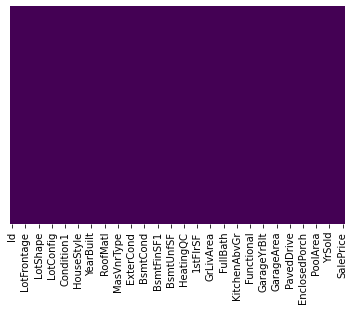

In [ ]:
#Try to see null values with heatmap
sns.heatmap(df_train.isnull(),yticklabels=False,cbar=False,cmap="viridis")

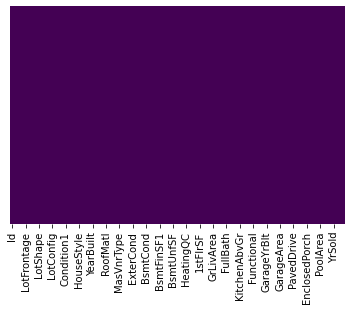

In [ ]:
#Try to see null values with heatmap
sns.heatmap(df_test.isnull(),yticklabels=False,cbar=False,cmap="viridis")

In [ ]:
#Listed the columns with categorical values
columns=['MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood',
         'Condition2','BldgType','Condition1','HouseStyle','SaleType',
        'SaleCondition','ExterCond',
         'ExterQual','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
        'RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','Heating','HeatingQC',
         'CentralAir',
         'Electrical','KitchenQual','Functional','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive']

In [ ]:
#Function to use get dummies for all the columns
def category_onehot_multcols(multcolumns,df):
    for fields in multcolumns:
        df1=pd.get_dummies(df[fields],drop_first=True)
        df.drop([fields],axis=1,inplace=True)
        df=pd.concat([df,df1],axis=1)
    return df

In [ ]:
# We will concate train and test first and then get_dummies. 
# IF we perform one hot encoding for train and test speerately we might have different number of columns for train and test. Therefore, we would not be able to 
# perform predictice modeling.
df_train_test=pd.concat([df_train,df_test],axis=0)

In [ ]:
df_train_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000.0


In [ ]:
df_train_test.shape

(2919, 76)

In [ ]:
# Performing one shot encoding for train and test combined
df_train_test=category_onehot_multcols(columns,df_train_test)

In [ ]:
print(df_train_test.shape)
# Removing duplicate columns
df_train_test=df_train_test.loc[:,~df_train_test.columns.duplicated()]

(2919, 235)


In [ ]:
df_train_test.shape

(2919, 178)

In [ ]:
df_train_test.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,FV,RH,...,WdShake,WdShngl,AsphShn,BrkComm,BrkFace,CemntBd,HdBoard,ImStucc,MetalSd,Plywood,Stucco,VinylSd,Wd Sdng,WdShing,Brk Cmn,CmentBd,Other,Wd Shng,None,GasA,GasW,Grav,OthW,Wall,Y,FuseF,FuseP,Mix,SBrkr,Maj2,Min1,Min2,Typ,Attchd,Basment,BuiltIn,CarPort,Detchd,RFn,P
0,1,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,150.0,856.0,856,854,0,1710,1.0,0.0,2,1,3,1,8,0,2003.0,2.0,548.0,0,61,0,0,0,0,0,2,2008,208500.0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,284.0,1262.0,1262,0,0,1262,0.0,1.0,2,0,3,1,6,1,1976.0,2.0,460.0,298,0,0,0,0,0,0,5,2007,181500.0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,434.0,920.0,920,866,0,1786,1.0,0.0,2,1,3,1,6,1,2001.0,2.0,608.0,0,42,0,0,0,0,0,9,2008,223500.0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,540.0,756.0,961,756,0,1717,1.0,0.0,1,0,3,1,7,1,1998.0,3.0,642.0,0,35,272,0,0,0,0,2,2006,140000.0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,490.0,1145.0,1145,1053,0,2198,1.0,0.0,2,1,4,1,9,1,2000.0,3.0,836.0,192,84,0,0,0,0,0,12,2008,250000.0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0


In [ ]:
# Segregating Train and test data. Record with salesprice as null will be our test data
df_test=df_train_test[df_train_test.SalePrice.isna() ]
df_test.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,FV,RH,...,WdShake,WdShngl,AsphShn,BrkComm,BrkFace,CemntBd,HdBoard,ImStucc,MetalSd,Plywood,Stucco,VinylSd,Wd Sdng,WdShing,Brk Cmn,CmentBd,Other,Wd Shng,None,GasA,GasW,Grav,OthW,Wall,Y,FuseF,FuseP,Mix,SBrkr,Maj2,Min1,Min2,Typ,Attchd,Basment,BuiltIn,CarPort,Detchd,RFn,P
0,1461,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,270.0,882.0,896,0,0,896,0.0,0.0,1,0,2,1,5,0,1961.0,1.0,730.0,140,0,0,0,120,0,0,6,2010,NaN,0,1,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0
1,1462,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,406.0,1329.0,1329,0,0,1329,0.0,0.0,1,1,3,1,6,0,1958.0,1.0,312.0,393,36,0,0,0,0,12500,6,2010,NaN,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0
2,1463,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,137.0,928.0,928,701,0,1629,0.0,0.0,2,1,3,1,6,1,1997.0,2.0,482.0,212,34,0,0,0,0,0,3,2010,NaN,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0
3,1464,60,78.0,9978,6,6,1998,1998,20.0,602.0,0.0,324.0,926.0,926,678,0,1604,0.0,0.0,2,1,3,1,7,1,1998.0,2.0,470.0,360,36,0,0,0,0,0,6,2010,NaN,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0
4,1465,120,43.0,5005,8,5,1992,1992,0.0,263.0,0.0,1017.0,1280.0,1280,0,0,1280,0.0,0.0,2,0,2,1,5,0,1992.0,2.0,506.0,0,82,0,0,144,0,0,1,2010,NaN,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0


In [ ]:
# Segregating Train and test data. Record with salesprice as not null will be our train data
df_train=df_train_test[df_train_test.SalePrice.notnull() ]
df_train.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,FV,RH,...,WdShake,WdShngl,AsphShn,BrkComm,BrkFace,CemntBd,HdBoard,ImStucc,MetalSd,Plywood,Stucco,VinylSd,Wd Sdng,WdShing,Brk Cmn,CmentBd,Other,Wd Shng,None,GasA,GasW,Grav,OthW,Wall,Y,FuseF,FuseP,Mix,SBrkr,Maj2,Min1,Min2,Typ,Attchd,Basment,BuiltIn,CarPort,Detchd,RFn,P
0,1,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,150.0,856.0,856,854,0,1710,1.0,0.0,2,1,3,1,8,0,2003.0,2.0,548.0,0,61,0,0,0,0,0,2,2008,208500.0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,284.0,1262.0,1262,0,0,1262,0.0,1.0,2,0,3,1,6,1,1976.0,2.0,460.0,298,0,0,0,0,0,0,5,2007,181500.0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,434.0,920.0,920,866,0,1786,1.0,0.0,2,1,3,1,6,1,2001.0,2.0,608.0,0,42,0,0,0,0,0,9,2008,223500.0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,540.0,756.0,961,756,0,1717,1.0,0.0,1,0,3,1,7,1,1998.0,3.0,642.0,0,35,272,0,0,0,0,2,2006,140000.0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,490.0,1145.0,1145,1053,0,2198,1.0,0.0,2,1,4,1,9,1,2000.0,3.0,836.0,192,84,0,0,0,0,0,12,2008,250000.0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0


In [ ]:
# creating x_train and y_train
x_train=df_train.drop(["SalePrice","Id"],axis=1)
y_train=df_train[["SalePrice"]]

In [ ]:
# Using xgboost model
import xgboost
classifier=xgboost.XGBRegressor()
classifier.fit(x_train,y_train)

[19:49:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [ ]:
#Predicting value of y_train and checking for accuracy
y_train_predict=classifier.predict(x_train)
mean_squared_error(y_train, y_train_predict)
XGBoost_mean_absolute_error=mean_absolute_error(y_train, y_train_predict)


In [ ]:
#Predicting values for y_test
x_test=df_test.drop(["SalePrice","Id"],axis=1)
y_test=classifier.predict(x_test)

In [ ]:
y_test

array([123523.41, 153284.73, 179332.86, ..., 166942.16, 123410.03,
       240476.55], dtype=float32)

In [ ]:
#Creating output file with columns ID and sales price
pred=pd.DataFrame(y_test)
final_dataset=pd.concat([df_test["Id"],pred],axis=1)


In [ ]:
final_dataset.head()

,Id,0
0,1461,123523.406250
1,1462,153284.734375
2,1463,179332.859375
3,1464,180460.546875
4,1465,195258.156250


In [ ]:
#writing to the output csv
final_dataset.to_csv("Submission.csv",index=False)

In [ ]:
#Trying through linear regression
from sklearn.linear_model import LinearRegression
linear_regressor = LinearRegression()  
linear_regressor.fit(x_train,y_train)
y_train_predict = linear_regressor.predict(x_train)  
mean_squared_error(y_train, y_train_predict)
linear_mean_absolute_error=mean_absolute_error(y_train, y_train_predict)


In [ ]:
# Try predicting using deep learning
import tensorflow as tf
from tensorflow import keras

model= keras.Sequential ([
        keras.layers.Dense(128,kernel_initializer='normal', input_shape=(176,),activation='relu'),
        keras.layers.Dense(256,kernel_initializer='normal',activation='relu'),
        keras.layers.Dense(256,kernel_initializer='normal',activation='relu'),
        keras.layers.Dense(256,kernel_initializer='normal',activation='relu'),
        keras.layers.Dense(1,kernel_initializer='normal',activation='linear')
        ])
model.compile (optimizer="adam",
              loss='mse',
                metrics=[ 'mean_squared_logarithmic_error']
              )
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 128)               22656     
                                                                 
 dense_11 (Dense)            (None, 256)               33024     
                                                                 
 dense_12 (Dense)            (None, 256)               65792     
                                                                 
 dense_13 (Dense)            (None, 256)               65792     
                                                                 
 dense_14 (Dense)            (None, 1)                 257       
                                                                 
Total params: 187,521
Trainable params: 187,521
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(x_train,y_train,epochs=500)

Epoch 1/500
46/46 [==============================] - 1s 5ms/step - loss: 24680673280.0000 - mean_squared_logarithmic_error: 8.0472
Epoch 2/500
46/46 [==============================] - 0s 5ms/step - loss: 6772957184.0000 - mean_squared_logarithmic_error: 0.1386
Epoch 3/500
46/46 [==============================] - 0s 4ms/step - loss: 4216875776.0000 - mean_squared_logarithmic_error: 0.0946
Epoch 4/500
46/46 [==============================] - 0s 4ms/step - loss: 3416882688.0000 - mean_squared_logarithmic_error: 0.0792
Epoch 5/500
46/46 [==============================] - 0s 4ms/step - loss: 3022212864.0000 - mean_squared_logarithmic_error: 0.0755
Epoch 6/500
46/46 [==============================] - 0s 4ms/step - loss: 2682619136.0000 - mean_squared_logarithmic_error: 0.0656
Epoch 7/500
46/46 [==============================] - 0s 4ms/step - loss: 2404731648.0000 - mean_squared_logarithmic_error: 0.0574
Epoch 8/500
46/46 [==============================] - 0s 4ms/step - loss: 2210850048.0000 

In [ ]:
yp=model.predict(x_train)
yp


array([[208176.25],
       [183083.3 ],
       [218702.36],
       ...,
       [260047.75],
       [144817.25],
       [147559.17]], dtype=float32)

In [ ]:
#y_train_predict=model.predict(x_test)
Keras_mean_absolute_error= mean_absolute_error(y_train, yp)


In [ ]:
#Trying random forest model
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(x_train,y_train)
# Get the mean absolute error on the validation data
predicted_prices = model.predict(x_train)
random_forest_mae = mean_absolute_error(y_train , predicted_prices)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


In [ ]:
print("XGBoost Mean absolute Error:              ",XGBoost_mean_absolute_error)
print("Linear regression Mean absolute error:    ",linear_mean_absolute_error)
print("Keras Mean absolute error:                ",Keras_mean_absolute_error )
print('Random forest validation MAE:             ',random_forest_mae)

XGBoost Mean absolute Error:               11137.776383240582
Linear regression Mean absolute error:     15615.924349097346
Keras Mean absolute error:                 9655.20632223887
Random forest validation MAE:              6482.6045


In [ ]:
y_test=model.predict(x_test)
pred=pd.DataFrame(yp)
final_dataset=pd.concat([df_test["Id"],pred],axis=1)
final_dataset.columns=["Id","SalePrice"]
final_dataset.to_csv("Submission.csv",index=False)